<a href="https://colab.research.google.com/github/2003UJAN/Implementing-CNN-model-using-traffic-images/blob/main/CNN_Model_Traffic_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
#cloning german traffic dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [108]:
#listing content of german tarffic dataset
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [109]:
#installing package
!pip install keras-utils

In [110]:
#import libraries,neural network setup,keras model creation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [111]:
#random number geneartor
np.random.seed(0)

In [112]:
#loading data from pickle files,data organisation,extract features
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [113]:
#shape of dataset
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [114]:
#setting no of images & image size
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32 x 32 x 3"

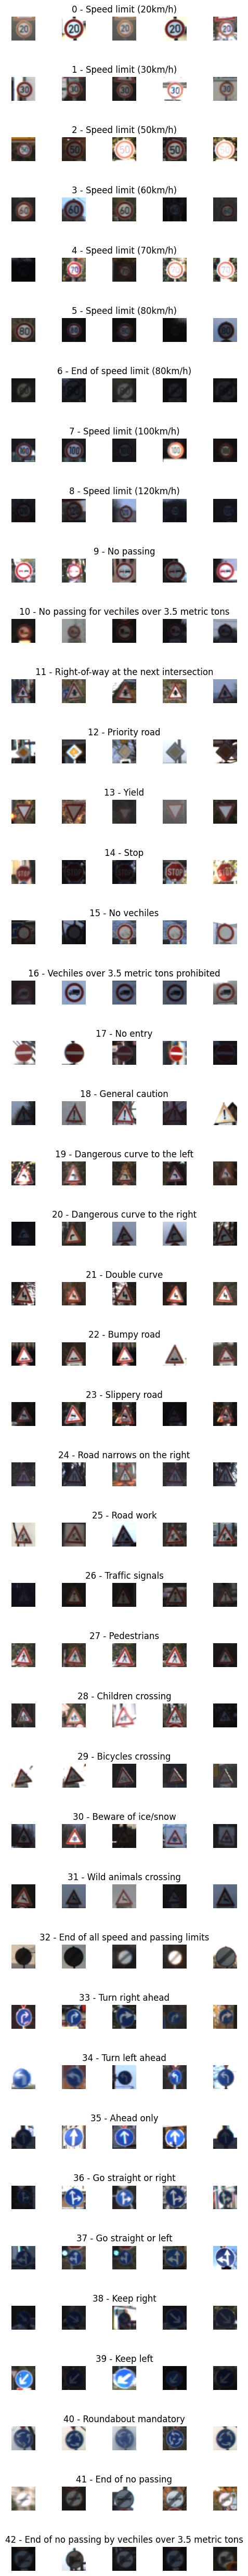

In [115]:
#reading csv file, intialise variable, create subplots
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

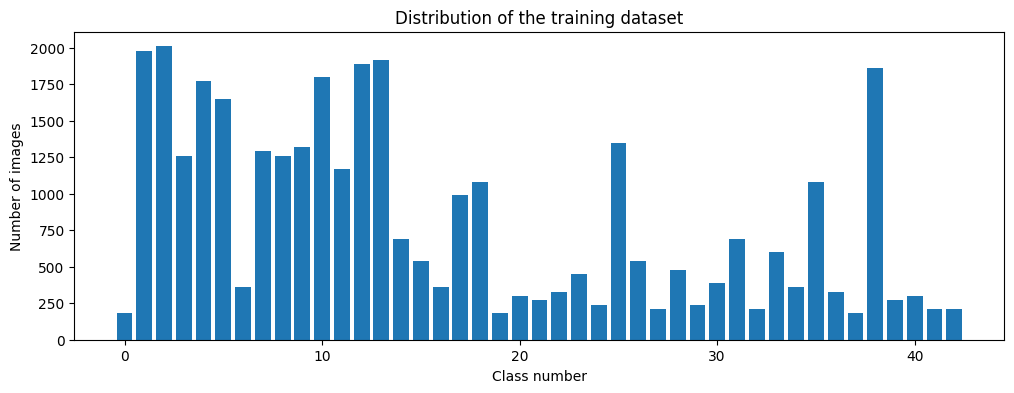

In [116]:
#printing no of images and plotting the graph
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


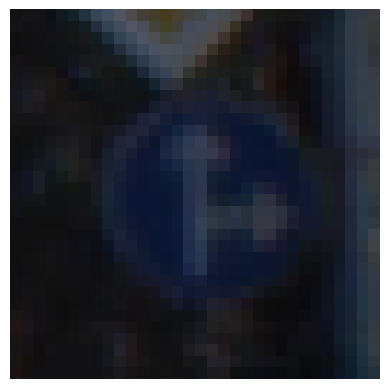

In [117]:
#import libraries, image display and its info
import cv2
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


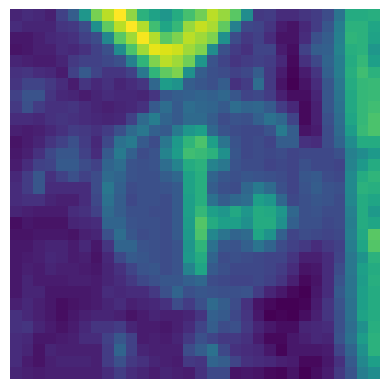

In [118]:
#converting to gray-scale images
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


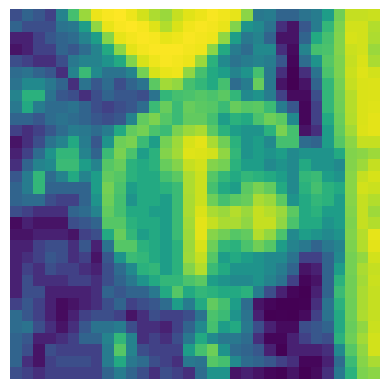

In [119]:
#equalising histogram
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [120]:
#pre-processing images
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


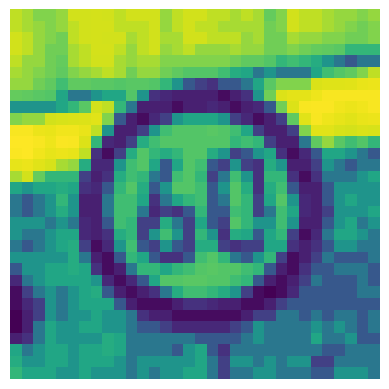

In [121]:
#displaying random image and printing shape
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [122]:
#reshaping data
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [123]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10)
datagen.fit(X_train)

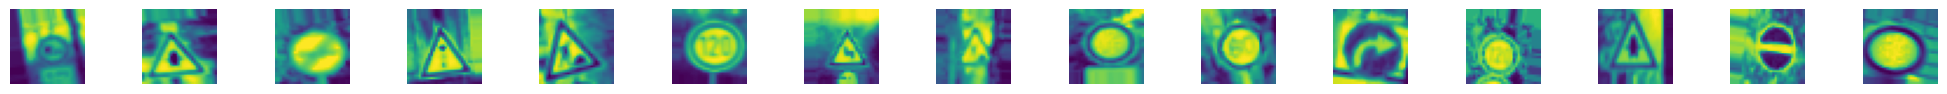

In [124]:
#generating augmentated batches
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis('off')

In [125]:
#printing & interpreting the shapes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [126]:
#convert target variable to categorical form
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [127]:
#convolutional layers & flatten layers
def modified_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [128]:
#create instance of neural network
model = modified_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                 

In [129]:
#training Neural network by generator fn
history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=50),
    steps_per_epoch=len(X_train) // 50,
    epochs=10,
    validation_data=(X_test, y_test)
)

<ipython-input-129-e952d368ccdf>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
695/695 [==============================] - 438s 628ms/step - loss: 1.8265 - accuracy: 0.4862 - val_loss: 0.3649 - val_accuracy: 0.8845
Epoch 2/10
695/695 [==============================] - 357s 514ms/step - loss: 0.5478 - accuracy: 0.8341 - val_loss: 0.2056 - val_accuracy: 0.9396
Epoch 3/10
695/695 [==============================] - 369s 531ms/step - loss: 0.3279 - accuracy: 0.8992 - val_loss: 0.1636 - val_accuracy: 0.9535
Epoch 4/10
695/695 [==============================] - 370s 533ms/step - loss: 0.2454 - accuracy: 0.9252 - val_loss: 0.1703 - val_accuracy: 0.9534
Epoch 5/10
695/695 [==============================] - 371s 533ms/step - loss: 0.1959 - accuracy: 0.9397 - val_loss: 0.1434 - val_accuracy: 0.9576
Epoch 6/10
695/695 [==============================] - 372s 535ms/step - loss: 0.1791 - accuracy: 0.9445 - val_loss: 0.1431 - val_accuracy: 0.9621
Epoch 7/10
695/695 [==============================] - 372s 536ms/step - loss: 0.1470 - accuracy: 0.9543 - val_loss: 0.1280 -

Text(0.5, 0, 'epoch')

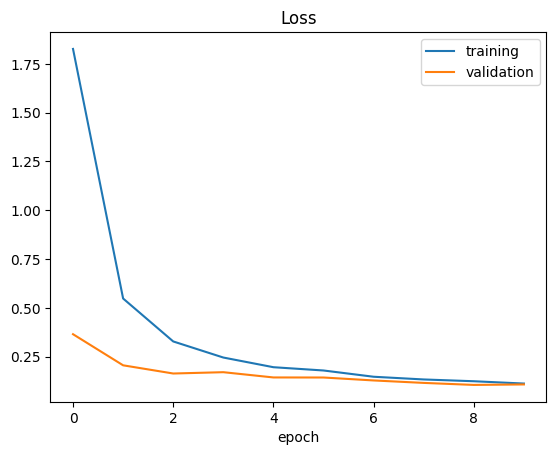

In [130]:
#training and validation loss of neural network model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [131]:
# performance of trained neural network model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.10762813687324524
Test Accuracy: 0.9695962071418762


In [ ]:
#using Python library matplotlib to download an image from an URL,display it.
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
#image processing using OpenCV Python library
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [134]:
#re-shaping the image
img = img.reshape(1, 32, 32, 1)

In [135]:
#printing the final traffic sign image
print("Predicted sign: "+ str(model.predict(img)))

1/1 [==============================] - 0s 99ms/step
Predicted sign: [[2.2878899e-13 7.6685377e-12 1.7596156e-12 2.4135611e-15 7.1403198e-18
  7.1298829e-14 1.6011453e-13 1.3412638e-17 6.8867260e-15 2.8942811e-14
  1.2184884e-18 3.1559020e-12 9.0872405e-14 4.4185471e-19 4.1294765e-17
  4.5157418e-20 7.7097918e-16 7.8882862e-17 2.5044013e-13 2.4100220e-09
  2.2125615e-08 6.5750405e-09 3.7720001e-05 8.9456546e-07 8.8598352e-07
  5.2057975e-03 1.8955204e-12 4.9769151e-12 5.6552278e-07 9.9400592e-01
  7.4701890e-04 1.0832938e-06 1.5907194e-17 4.5100091e-20 2.7134873e-13
  3.2610603e-15 2.8479435e-21 6.5835575e-14 1.7395143e-11 9.3183263e-15
  9.2496746e-11 3.8409238e-18 4.4417266e-22]]
